# POLYNOMIAL REGRESSION


In [ ]:
# Polynomial Regression is a form of regression analysis in which the relationship between the
# independent variables and dependent variables are modeled in the nth degree polynomial.


#  Types of polinomials

#1st degree ---> linear    b1x + b0

#2nd degree ---> Quadratic b2x**2 + b1x + b0

#3rd degree ---> Cubic     b3x**3 + b2x**2 + b1x + b0

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
%matplotlib  inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.preprocessing import PolynomialFeatures

# I am importing polynomialFeatures toimport poly features

In [2]:
data = np.array([[2,3,4]])
print(data)


# I am going to transform 3 element data to quadratic function

[[2 3 4]]


In [6]:
trans = PolynomialFeatures(degree = 2 , include_bias= False)

# We can write anything we want for degree 
# In linear regression our bias is intercept thats why we dont have to be add include_bias


In [7]:
trans.fit(data)

PolynomialFeatures(include_bias=False)

In [8]:
trans.transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [9]:
trans.fit_transform(data)


# we can do fit and transform function at the one code

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

# READ DATASET

In [12]:
df = pd.read_csv(r"C:\Users\fatih\Downloads\Advertising (2).csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# POLYNOMIAL CONVERTER 

In [13]:
X = df.drop("sales", axis = 1)
y= df.sales

In [14]:
polynomial_converter = PolynomialFeatures(degree = 2 , include_bias =False)

In [15]:
polynomial_converter.fit(X)


# I did all of the data transform formula

PolynomialFeatures(include_bias=False)

In [18]:
poly_features = polynomial_converter.transform(X)

# We got quadratic poly features with our data

In [19]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [21]:
poly_features.shape


# We got 9 feature after the transform(we were 3)

(200, 9)

In [22]:
pd.DataFrame(poly_features , columns = ["TV", "radio", "newspaper", "TV^2", "TV&radio", \
                                       "TV&newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"]).head()

,TV,radio,newspaper,TV^2,TV&radio,TV&newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [23]:
X.shape

(200, 3)

# Train/Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [29]:
X_train , X_test , y_train , y_test = train_test_split(poly_features, y, test_size = 0.2, random_state=42)


# when we are spliting our data as train and test we give 9 features into train_test_split function

# MODEL FOR FITTING

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model_poly = LinearRegression()

In [30]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model_poly.predict(X_test)

In [32]:

my_dict = {"Actual" : y_test, "pred" : y_pred , "residuals" : y_test - y_pred}
compare = pd.DataFrame(my_dict)
compare


# I did some progress on data

,Actual,pred,residuals
95,16.9,17.254436,-0.354436
15,22.4,22.719332,-0.319332
30,21.4,20.427994,0.972006
158,7.3,7.542709,-0.242709
128,24.7,24.371030,0.328970
115,12.6,12.559272,0.040728
69,22.3,22.807850,-0.507850
170,8.4,8.343714,0.056286
174,11.5,12.058602,-0.558602
45,14.9,15.690246,-0.790246


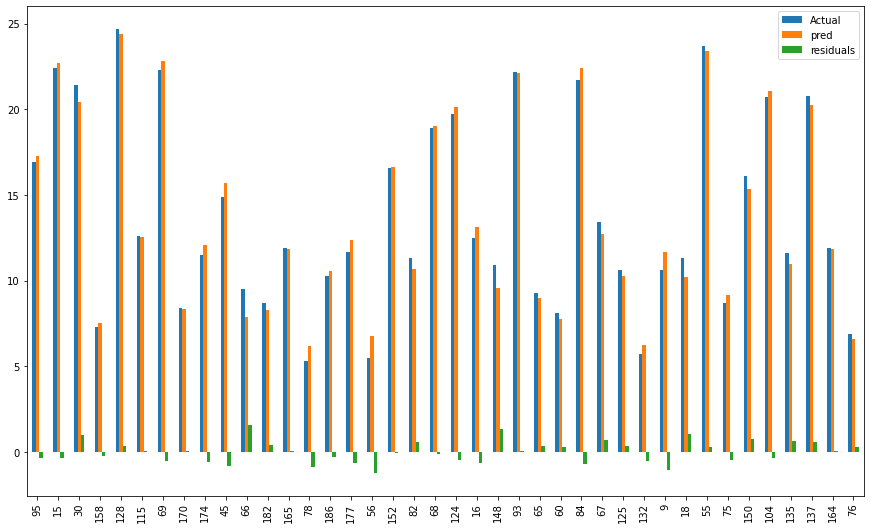

In [33]:
compare.plot(kind="bar", figsize=(15,9))
plt.show();

# POLY COEFFICIENT

In [34]:
model_poly.coef_


# We can see coefficient of 9 g-features

array([ 5.32356160e-02,  1.70980451e-02,  1.05807447e-02, -1.12286779e-04,
        1.11121741e-03, -7.37989541e-05,  1.32842962e-04,  1.24892479e-04,
        2.79665560e-05])

In [36]:
df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["coef"])


# I named the feature for them make readable

In [37]:
df_coef

# This is not a scaled data thats why we can not analyze base on this

,coef
TV,0.053236
radio,0.017098
newspaper,0.010581
TV^2,-0.000112
TV&Radio,0.001111
TV&Newspaper,-0.000074
Radio^2,0.000133
Radio&newspaper,0.000125
Newspaper^2,0.000028


# Evaluating on the test

In [38]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [40]:
y_pred = model_poly.predict(X_test)

In [43]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")



    # We can see all metrics in one place

In [44]:
eval_metric(y_test , y_pred)

# This is very proper data that we can give to customer to make prediction

Model testing performance:
--------------------------
R2_score : 0.9869181490609604
MAE      : 0.5261794444043826
MSE      : 0.41291022853790027
RMSE     : 0.6425809120553615


In [46]:
y_train_pred = model_poly.predict(X_train)


# I should have to check  the data has got overfitting or learned proper way
# I should compare test data with train data

In [47]:
eval_metric(y_train , y_train_pred)



# As we can see there are very close which means data can generalized and also 
# there is no overfitting/underfitting problem

Model testing performance:
--------------------------
R2_score : 0.986104518792419
MAE      : 0.40897219513552674
MSE      : 0.36039667447012225
RMSE     : 0.6003304710491733


In [ ]:
#Multiple Linear Regression:
 #   MAE      : 1.46
  #  RMSE     : 1.78
   # r2_score : 0.89


# Polynomial 2-degree:
#    MAE      : 0.52
 #   RMSE     : 0.64
  #  r2_score : 0.98




  # As we can see polynomial 2-degree model are way too
  # better than the Multiple Linear one

In [71]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias = False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, 
                         "number of features":number_of_features}, index=range(1,d))




   # I tried to understand this def function

In [73]:
poly(7)

# When degree level incease train and test both decrease


,train_rmse_errors,test_rmse_errors,number of features
1,1.644728,1.781600,3
2,0.600330,0.642581,9
3,0.464824,0.542742,19
4,0.368413,0.786099,34
5,0.250495,8.746523,55
6,0.214949,28.380380,83


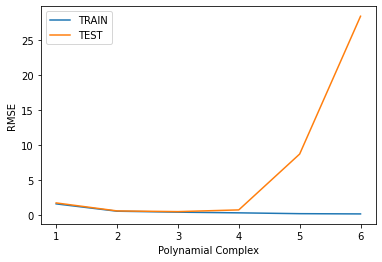

In [72]:
plt.plot(range(1,7), poly(7)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,7), poly(7)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

-# We should have keep away from explosion point 
# Explosion point start with 4 thats why we should 
# choose 2 or 3
# Generally speaking we should choose less feature
# thats why 2 would be better option


# FINALIZING MODEL CHOISE

In [77]:
final_poly_converter = PolynomialFeatures(degree = 2, include_bias = False)

# We chose degree 2

In [74]:
final_model = LinearRegression()

In [78]:
poly_X = final_poly_converter.fit_transform(X)



# We take new poly features by degree = 2

In [79]:
final_model.fit(poly_X, y)


# We train our data with new poly feature

LinearRegression()

In [81]:
poly_X.shape

(200, 9)

# PREDICTIONS 

In [83]:
new_record = [[150,20,15]]


# I define 2 dimensional data

In [84]:
new_record_poly = final_poly_converter.fit_transform(new_record)


# Our model trained by poly_feature function thats why we should
# convert our data to poly_feature

In [86]:
new_record_poly.shape


# We can see  our feature number increased by 9

(1, 9)

In [87]:
final_model.predict(new_record_poly)

array([14.17474185])

# OVERFITTING

In [90]:
over_poly_converter  = PolynomialFeatures(degree = 5, include_bias =False)


# I already know that degree 5 is overfitting thats swhy ı choosing to see 
# what is happening there

In [88]:
over_model = LinearRegression()

In [91]:
poly_features = over_poly_converter.fit_transform(X)

In [92]:
X_train , X_test, y_train, y_test = train_test_split(poly_features , y, test_size = 0.2, random_state = 42)


In [93]:
over_model.fit(X_train, y_train)


LinearRegression()

In [94]:
y_pred_over = over_model.predict(X_test)

In [95]:
eval_metric(y_test, y_pred_over)


# As we can see R2_score is negative
# and model is dont understand 


Model testing performance:
--------------------------
R2_score : -1.423731017799717
MAE      : 2.1076486317855485
MSE      : 76.50166120510427
RMSE     : 8.746522806527418


In [96]:
y_train_over = over_model.predict(X_train)



In [97]:
eval_metric(y_train, y_train_over)


# As we can see model is great at train
# also terrible at testing

Model testing performance:
--------------------------
R2_score : 0.997580694449434
MAE      : 0.18795498586247433
MSE      : 0.06274771358586825
RMSE     : 0.2504949372459816


# UNDERFITTING

In [ ]:
#Linear Regression (Poly 1.Degree)                Poly 2.Degree

#Testing data performance:                        Testing data performance:
#--------------------------                       --------------------------  
#R2_score 	: 0.899438024100912                  R2_score : 0.9869181490609605
#MAE 		: 1.4607567168117601                 MAE      : 0.5261794444043759
#MSE 		: 3.174097353976104                  MSE      : 0.41291022853789877
#RMSE 		: 1.7815996615334502                 RMSE     : 0.6425809120553604       


#Training data performance:                       Training data performance:
#--------------------------                       --------------------------
#R2_score 	: 0.8957008271017817                 R2_score : 0.986104518792419
#MAE 		: 1.1984678961500137                 MAE      : 0.4089721951355191
#MSE 		: 2.7051294230814142                 MSE      : 0.36039667447012225
#RMSE 		: 1.6447277656443373                 RMSE     : 0.6003304710491733



# As we can see poly 2.degree model is working too better than degree 1 and 5